### Student Information
Name: 田雷西

Student ID: s1113535

GitHub ID: Thewo-6

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maxallywolftheresias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Exercise 1

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

for i in range(3):
    print(f"Sample {i + 1}:\n")
    print("\n".join(twenty_train.data[i].split("\n")))

Sample 1:

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

Sample 2:

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rect

# Exercise 2

In [14]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# (0) Quick sanity check
assert {'text','category','category_name'}.issubset(X.columns), "X must have text/category/category_name"

# 1) Basic boolean filtering (AND)
ex1 = X[(X['category_name'] == 'sci.med') & (X['text'].str.len() > 1200)]
display(ex1.head(3))

# 2) OR condition + column subset
ex2 = X[(X['category_name'] == 'comp.graphics') | (X['category_name'] == 'sci.space')][['category_name','text']]
display(ex2.head(3))

# 3) Using .isin and negation (~)
ex3 = X[~X['category_name'].isin(['talk.politics.misc','talk.politics.guns'])]
display(ex3.sample(3, random_state=0))

# 4) The .query() API (same logic as #2, but as a string)
ex4 = X.query("category_name in ['comp.graphics','sci.space']")
display(ex4.head(3))

# 5) String contains (case-insensitive) with regex word boundary
ex5 = X[X['text'].str.contains(r'\bcancer\b', case=False, na=False)]
display(ex5[['category_name','text']].head(3))

# 6) Length-based queries (add a computed column, then filter)
ex6 = X.assign(chars=X['text'].str.len())
display(ex6.query("chars >= 1500").nlargest(3, 'chars')[['category_name','chars']])

# 7) Positional slicing after a filter (every 10th row)
ex7 = X.loc[X['category_name'] == 'sci.med'].iloc[::10]
display(ex7.head(3))

# 8) Group-wise sampling: take 2 examples per category (useful for quick peeks)
ex8 = (X.groupby('category_name', group_keys=False)
         .apply(lambda d: d.head(2)))  # or .sample(n=2, random_state=42)
display(ex8.head(6))

# 9) Counting “keyword hits” per class (boolean mask then groupby mean)
ex9 = (X['text'].str.contains(r'\bwindows\b', case=False, na=False))  # keyword: "windows"
hits_by_class = X.assign(has_kw=ex9).groupby('category_name')['has_kw'].mean().sort_values(ascending=False)
display(hits_by_class.head(5))

# 10) Combining eval/query style for readability (chars & words)
ex10 = X.assign(
    chars = X['text'].str.len(),
    words = X['text'].str.split().str.len()
).query("chars.between(800, 1600) and words >= 120")
display(ex10[['category_name','chars','words']].head(3))

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med


,category_name,text
0,comp.graphics,From: sd345@city.ac.uk (Michael Collier) Subje...
1,comp.graphics,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
11,comp.graphics,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...


,text,category,category_name
1604,From: ss6349@csc.albany.edu (Steven H. Schimmr...,3,soc.religion.christian
1036,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2144,From: berger@chaos.cs.brandeis.edu (David Berg...,1,comp.graphics


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics


,category_name,text
30,sci.med,From: vgwlu@dunsell.calgary.chevron.com (greg ...
103,sci.med,From: mrb@cbnewsj.cb.att.com (m..bruncati) Sub...
123,sci.med,From: david@stat.com (David Dodell) Subject: H...


,category_name,chars
1890,comp.graphics,60713
400,comp.graphics,58574
433,comp.graphics,57076


,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med


/var/folders/cb/rwzl5skx2kzfq164mjgs1d500000gn/T/ipykernel_52623/3703779350.py:48: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: d.head(2)))  # or .sample(n=2, random_state=42)


,text,category,category_name
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med


category_name
comp.graphics             0.111301
sci.med                   0.006734
alt.atheism               0.000000
soc.religion.christian    0.000000
Name: has_kw, dtype: float64

,category_name,chars,words
1,comp.graphics,1004,181
4,soc.religion.christian,966,141
6,soc.religion.christian,1510,242


# Exercise 3

In [4]:
# Answer here
X[X["category_name"] == "sci.med"][::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


# Exercise 4

In [5]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amount of missing records is: , 0)
1       (The amount of missing records is: , 0)
2       (The amount of missing records is: , 0)
3       (The amount of missing records is: , 0)
4       (The amount of missing records is: , 0)
                         ...                   
2252    (The amount of missing records is: , 0)
2253    (The amount of missing records is: , 0)
2254    (The amount of missing records is: , 0)
2255    (The amount of missing records is: , 0)
2256    (The amount of missing records is: , 0)
Length: 2257, dtype: object

# Exercise 5

In [6]:
# Answer here
"I have observed that only the first two records and the fifth one are detected as missing values. The other records contain string representations of missing values, which are not recognized as NaN by pandas."

'I have observed that only the first two records and the fifth one are detected as missing values. The other records contain string representations of missing values, which are not recognized as NaN by pandas.'

# Exercise 6

In [7]:
# Answer here
"1. Row count dropped to 1000 after sampling."
"2. The order of the rows is shuffled randomly."

'2. The order of the rows is shuffled randomly.'

# Exercise 7

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

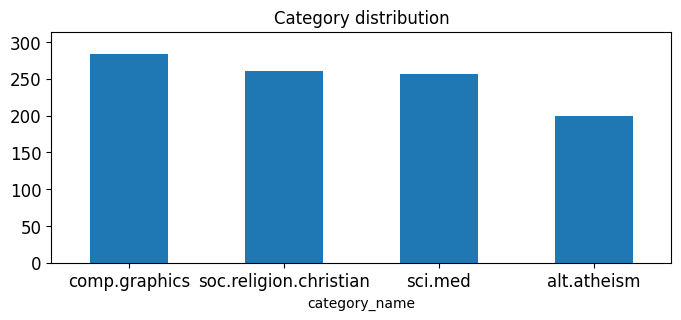

In [8]:
# Answer here
X_sample = X.sample(n=1000) #random state

X_sample.category_name.value_counts().plot(kind = 'bar',
                                         title = 'Category distribution',
                                         ylim = [0, X_sample.category_name.value_counts().max() + 30],
                                         rot = 0, fontsize = 12, figsize = (8,3))

# Exercise 8

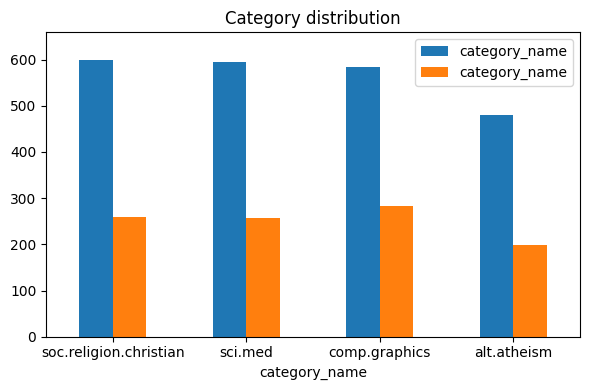

In [9]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

# counts for each dataset
cX  = X['category_name'].value_counts().rename('category_name')
cXs = X_sample['category_name'].value_counts().rename('category_name')

# align categories and build a 2-column table
counts = pd.concat([cX, cXs], axis=1)

ax = counts.plot(
    kind='bar', rot=0, figsize=(6,4),
    title='Category distribution'
)

# dynamic headroom on y-axis
ax.set_ylim(0, counts.to_numpy().max() * 1.10)

plt.tight_layout()
plt.show()

# Exercise 9

In [10]:
# Answer here
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

analyze = count_vect.build_analyzer()

analyze(X.text[0])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maxallywolftheresias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maxallywolftheresias/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

# Exercise 10

In [11]:
# Answer here
# Step 1. Get all feature (word) names
feature_names = count_vect.get_feature_names_out()

# Step 2. Select the 5th record (index 4)
fifth_array = X_counts[0:5, 0:100].toarray()[4]

# Step 3. Find all positions (columns) where the value == 1
indices = fifth_array.nonzero()[0]

# Step 4. Get the SECOND 1 (index 1, because Python starts at 0)
second_index = indices[1]

# Step 5. Map that to the corresponding word
second_word = feature_names[second_index]

print(second_word)


01


# Exercise 11

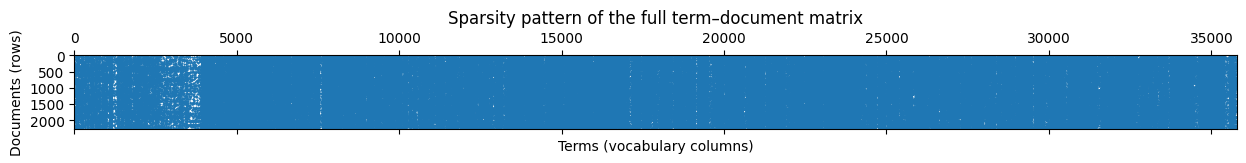

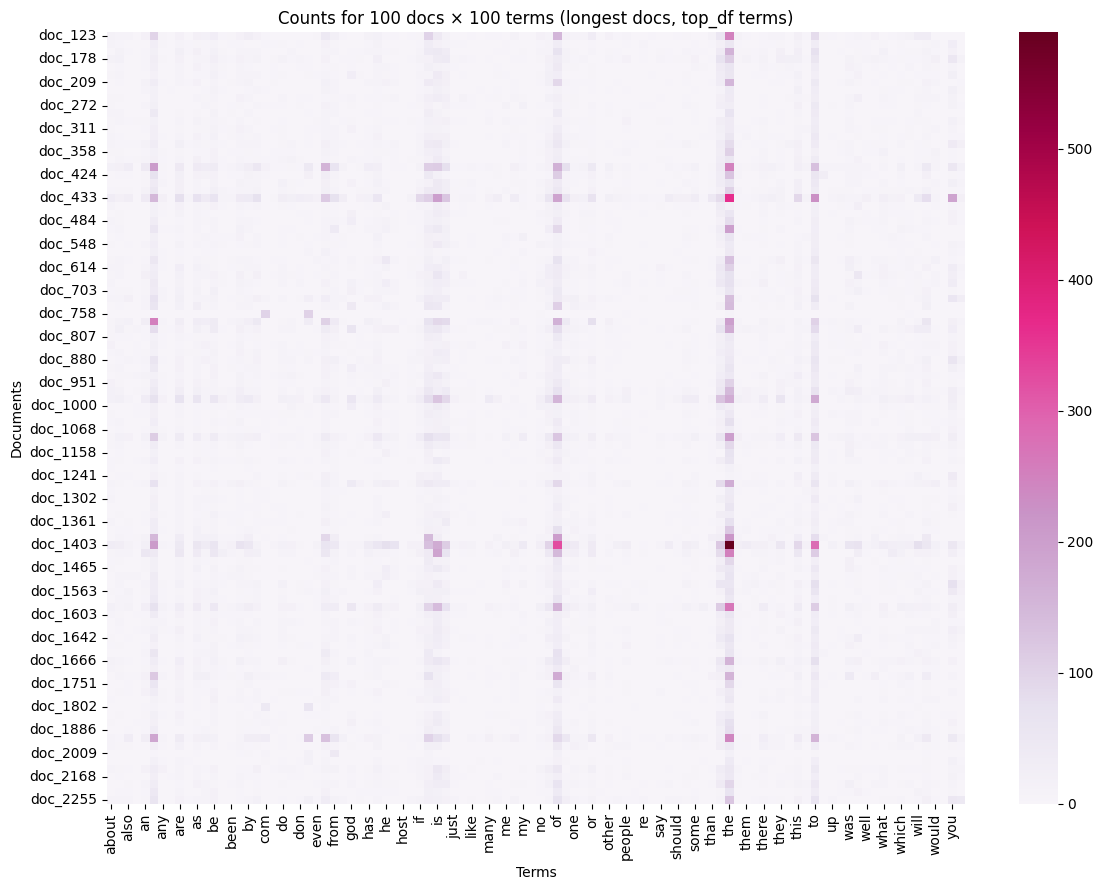

In [12]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(15,4))
plt.spy(X_counts, markersize=0.5)   # accepts scipy.sparse directly
plt.title("Sparsity pattern of the full term–document matrix")
plt.xlabel("Terms (vocabulary columns)")
plt.ylabel("Documents (rows)")
plt.show()


def heatmap_subset(X_counts, vectorizer, n_terms=50, n_docs=50,
                   term_strategy="top_df", doc_strategy="longest",
                   random_state=0):
    rng = np.random.default_rng(random_state)
    vocab = vectorizer.get_feature_names_out()

    # choose terms
    if term_strategy == "top_df":
        df = np.asarray((X_counts > 0).sum(axis=0)).ravel()  # document frequency per term
        term_idx = np.argsort(df)[-n_terms:]
    elif term_strategy == "random":
        term_idx = rng.choice(X_counts.shape[1], size=n_terms, replace=False)
    else:
        raise ValueError("term_strategy must be 'top_df' or 'random'")
    term_idx.sort()

    # choose docs
    if doc_strategy == "longest":
        doc_lengths = np.asarray(X_counts.sum(axis=1)).ravel()  # total tokens per doc
        doc_idx = np.argsort(doc_lengths)[-n_docs:]
    elif doc_strategy == "random":
        doc_idx = rng.choice(X_counts.shape[0], size=n_docs, replace=False)
    else:
        raise ValueError("doc_strategy must be 'longest' or 'random'")
    doc_idx.sort()

    # extract and densify only the chosen block
    block = X_counts[doc_idx, :][:, term_idx].toarray()

    # labels
    term_labels = [vocab[i] for i in term_idx]
    doc_labels  = [f"doc_{i}" for i in doc_idx]

    # plot
    df_block = pd.DataFrame(block, index=doc_labels, columns=term_labels)
    plt.figure(figsize=(12, 9))
    ax = sns.heatmap(df_block, cmap="PuRd", vmin=0, vmax=max(1, block.max()), annot=False)
    ax.set_xlabel("Terms"); ax.set_ylabel("Documents")
    ax.set_title(f"Counts for {len(doc_idx)} docs × {len(term_idx)} terms "
                 f"({doc_strategy} docs, {term_strategy} terms)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# How I use the function
heatmap_subset(X_counts, count_vect, n_terms=100, n_docs=100,
               term_strategy="top_df", doc_strategy="longest", random_state=42)


# Exercise 12

In [15]:
# Answer here
import plotly.express as px
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df_top = pd.DataFrame({"Term": count_vect.get_feature_names_out()[:300], "Total frequency": term_frequencies[:300]})

g = px.bar(
    df_top,
    x="Term",
    y="Total frequency",
    title="Top 300 Most Frequent Terms"
)
g.update_layout(xaxis_tickangle=-90, bargap=0.15, height=420, width=1600, xaxis_tickfont=dict(size=6))
g.update_xaxes(tickmode='array', tickvals=list(range(0, 300, 10)), ticktext=count_vect.get_feature_names_out()[:300][::10])
g.show()


# Exercise 13

In [16]:
# Answer here
g = px.bar(df_top[:50], x="Term", y="Total frequency", title="Top 50 Most Frequent Terms")
g.update_layout(xaxis_tickangle=-90, bargap=0.15, height=400, width=1000)
g.show()

# Exercise 14

In [17]:
# Answer here
# Get sorted indices in descending order of frequency
top_idx = np.argsort(term_frequencies)[::-1][:300]

# Get top terms and their frequencies
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

df_top_50 = pd.DataFrame({"Term": top_terms[:50], "Total frequency": top_freqs[:50]})

g = px.bar(
    df_top_50,
    x="Term",
    y="Total frequency",
    title="Top 50 Most Frequent Terms"
)
g.update_layout(xaxis_tickangle=-90, bargap=0.15, height=420, width=1000, xaxis_tickfont=dict(size=6))
#g.update_xaxes(tickmode='array', tickvals=list(range(0, 300, 10)), ticktext=count_vect.get_feature_names_out()[:300][::10])
g.show()

# Exercise 15

In [18]:
# Answer here
top_idx = np.argsort(term_frequencies)[::-1][:300]

# Get top terms and their frequencies
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]
top_freqs_log = [math.log(i) for i in top_freqs]

df_top_50 = pd.DataFrame({"Term": top_terms[:50], "Total frequency": top_freqs_log[:50]})

g = px.bar(
    df_top_50,
    x="Term",
    y="Total frequency",
    title="Top 50 Most Frequent Terms (Log Scale)"
)
g.update_layout(xaxis_tickangle=-90, bargap=0.15, height=420, width=1000, xaxis_tickfont=dict(size=6))
#g.update_xaxes(tickmode='array', tickvals=list(range(0, 300, 10)), ticktext=count_vect.get_feature_names_out()[:300][::10])
g.show()

After sorting the terms by frequency and then applying the log transformation, the chart looked more balanced. The most frequent words were no longer overwhelmingly tall, and the mid- and low-frequency terms became easier to compare. The log scale reduced the gap between very common and less common words, making the overall distribution clearer. Since word frequencies follow a highly uneven (Zipfian) pattern, this transformation helped reveal a more meaningful view of how words are distributed across the corpus.

# Phase 2

In [ ]:
### Begin Assignment Here

# Exercise 16 

After reviewing the words filtered in each category, I noticed that some terms are unique to specific topics while others appear across multiple ones. For example, a few technical or context-specific words only show up in certain categories, while general or common terms are shared between several. This shows that each category has its own focus but also overlaps in some areas, which makes sense since some concepts are relevant to more than one topic.

# Exercise 17 


# Exercise 18


# Exercise 19


# Exercise 20

# Exercise 21

# Exercise 22

# Exercise 23

# Exercise 24

# Exercise 25
### In your opinion, how should one choose the best model for a given task, such as the classification example above?


After doing some research and reviewing the work completed in the previous sections of the notebook, I believe that  choosing the best model for a classification task depends mainly on understanding the data and the problem itself. 
If the data is structured and numerical, simpler models such as Logistic Regression, Decision Trees, or XGBoost often work well. For unstructured data like text or images, models such as CNNs or Transformers are usually more suitable.

In my opinion, it's important to begin with a simple baseline model before moving on to more complex ones. 
This helps establish a clear reference point and ensures that any improvement is meaningful. 
When comparing models, I would evaluate them using appropriate metrics such as 
accuracy, precision, recall, or F1-score, depending on the dataset and project goals.